<a href="https://colab.research.google.com/github/mayfluf/projetos-tainah-pand/blob/main/Projeto_Pandas_Funcionarios_Com_Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto: An√°lise de Funcion√°rios com Pandas
Este notebook realiza uma s√©rie de an√°lises utilizando a biblioteca Pandas sobre uma base de dados de funcion√°rios.

In [1]:
import pandas as pd
from datetime import datetime

## Leitura da Base de Dados

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSpCW9yMoUMQ4tknj5Lg_TYVfIC3P9KoVPPqlJKsBu2HzGaC579yCp9Ohxni2ncY-xyLfugXan9K6yf/pub?gid=636707205&single=true&output=csv')
df.head()

ID          Nome  Idade  Sal√°rio                 Cargo Departamento  \
0   1          Juan   42.0  9276.79              Florista   Financeiro   
1   2      Isabelly   65.0      NaN                   NaN    Opera√ß√µes   
2   3          Cau√™   35.0  3692.61  Lutador de jiu-jitsu          NaN   
3   4          Theo   34.0  2092.81                    DJ    Opera√ß√µes   
4   5  Pedro Miguel   47.0  5944.17        Neurocirurgi√£o           RH   

  Data de Contrata√ß√£o  Avalia√ß√£o de Desempenho  
0          2024-03-01                      3.6  
1          2023-04-04                      6.3  
2          2022-07-28                      5.7  
3                 NaN                      1.5  
4          2024-06-06                      6.2

## 01 - Quantos registros existem na base de dados?

In [3]:
print('Total de registros:', df.shape[0])

Total de registros: 50


## 02 - Quantos registros t√™m informa√ß√µes completas (sem valores ausentes)?

In [4]:
print('Registros completos:', df.dropna().shape[0])

Registros completos: 29


## 03 - Substituir valores ausentes na coluna 'Sal√°rio' pela m√©dia

In [5]:
media_salarial = df['Sal√°rio'].mean()
df['Sal√°rio'] = df['Sal√°rio'].fillna(media_salarial)
print('Nova m√©dia salarial:', df['Sal√°rio'].mean())

Nova m√©dia salarial: 5865.925111111112


## 04 - Substituir 'TI' por 'Tecnologia da Informa√ß√£o'

In [6]:
df['Departamento'] = df['Departamento'].replace('TI', 'Tecnologia da Informa√ß√£o')

## 05 - Qual √© o sal√°rio mais alto e quem o recebe?

In [7]:
salario_max = df['Sal√°rio'].max()
print(df[df['Sal√°rio'] == salario_max])

    ID  Nome  Idade  Sal√°rio       Cargo Departamento Data de Contrata√ß√£o  \
23  24  Jo√£o    NaN  9911.71  Cozinheira    Marketing          2021-12-24   

    Avalia√ß√£o de Desempenho  
23                      3.4  


## 06 - Quantos funcion√°rios est√£o no departamento de Marketing?

In [8]:
print('Funcion√°rios em Marketing:', df[df['Departamento'] == 'Marketing'].shape[0])

Funcion√°rios em Marketing: 10


## 07 - Idade m√©dia dos funcion√°rios por departamento

In [9]:
df.groupby('Departamento')['Idade'].mean()

Departamento
Financeiro                  47.500000
Marketing                   41.555556
Opera√ß√µes                   43.333333
RH                          39.928571
Tecnologia da Informa√ß√£o    44.857143
Name: Idade, dtype: float64

## 08 - Cargos √∫nicos presentes na base

In [10]:
df['Cargo'].unique()

array(['Florista', nan, 'Lutador de jiu-jitsu', 'DJ', 'Neurocirurgi√£o',
       'Ginecologista', 'Bedel', 'Lubrificador de m√°quinas',
       'Jogador de futebol', 'Piloto de avi√£o', 'Cameraman',
       'Odontologista est√©tico', 'Moldureiro', 'Dublador', 'Bioqu√≠mico',
       'Traumatologista', 'Instrumentista musical', 'Cartunista',
       'Tecn√≥logo em automa√ß√£o industrial', 'Balconista', 'Cantor',
       'Cozinheira', 'Tecn√≥logo em rochas ornamentais', 'Taxista',
       'Moleiro', 'Prot√©tico dent√°rio', 'Pianista', 'Cinegrafista',
       'Int√©rprete de B√≠blias', 'Carnavalesco', 'Ge√≥grafo', 'Empacotador',
       'Ator', 'Imunologista', 'Quiropraxista', 'Ferrovi√°rio',
       'Publicit√°rio', 'Seguran√ßa particular', 'Comerciante',
       'Artista de circo', 'Capit√£o', 'Jogador de handebol', 'Figurante',
       'Telegrafista', 'Judoca', 'Ortoptista', 'Gar√ßom'], dtype=object)

## 09 - Criar coluna 'Tempo na Empresa'

In [11]:
df['Data de Contrata√ß√£o'] = pd.to_datetime(df['Data de Contrata√ß√£o'])
df['Tempo na Empresa'] = datetime.now().year - df['Data de Contrata√ß√£o'].dt.year
df[['Nome', 'Tempo na Empresa']].head()

Nome  Tempo na Empresa
0          Juan               1.0
1      Isabelly               2.0
2          Cau√™               3.0
3          Theo               NaN
4  Pedro Miguel               1.0

## 10 - Top 5 funcion√°rios com mais tempo de empresa

In [12]:
df.sort_values(by='Tempo na Empresa', ascending=False)[['Nome', 'Tempo na Empresa']].head()

Nome  Tempo na Empresa
5       Emilly               5.0
10         NaN               5.0
29       Alice               5.0
20       Isaac               5.0
21  Ana Sophia               5.0

## 11 - Funcion√°rios com desempenho avaliado acima de 8

In [13]:
df[df['Avalia√ß√£o de Desempenho'] > 8].shape[0]

12

## 12 - Sal√°rio total por departamento

In [14]:
df.groupby('Departamento')['Sal√°rio'].sum()

Departamento
Financeiro                  42526.100000
Marketing                   66885.370222
Opera√ß√µes                   52666.850222
RH                          79870.290000
Tecnologia da Informa√ß√£o    42171.075111
Name: Sal√°rio, dtype: float64

## 13 - 5 funcion√°rios mais jovens

In [15]:
df.sort_values(by='Idade')[['Nome', 'Idade']].head()

Nome  Idade
5            Emilly   19.0
37  Marcos Vinicius   21.0
12     Pedro Miguel   23.0
14              NaN   23.0
45            Diogo   23.0

## 14 - Registros sem sal√°rio

In [16]:
df[df['Sal√°rio'].isnull()]

Empty DataFrame
Columns: [ID, Nome, Idade, Sal√°rio, Cargo, Departamento, Data de Contrata√ß√£o, Avalia√ß√£o de Desempenho, Tempo na Empresa]
Index: []

## 15 - Categoria de Sal√°rio

In [17]:
bins = [0, 3000, 7000, float('inf')]
labels = ['Baixo', 'M√©dio', 'Alto']
df['Categoria de Sal√°rio'] = pd.cut(df['Sal√°rio'], bins=bins, labels=labels)
df[['Nome', 'Sal√°rio', 'Categoria de Sal√°rio']].head()

Nome      Sal√°rio Categoria de Sal√°rio
0          Juan  9276.790000                 Alto
1      Isabelly  5865.925111                M√©dio
2          Cau√™  3692.610000                M√©dio
3          Theo  2092.810000                Baixo
4  Pedro Miguel  5944.170000                M√©dio

## 16 - Desempenho Simplificado com map

In [18]:
def simplificar_desempenho(valor):
    if valor <= 3:
        return 'Baixo'
    elif valor <= 7:
        return 'M√©dio'
    return 'Alto'

df['Desempenho Simplificado'] = df['Avalia√ß√£o de Desempenho'].map(simplificar_desempenho)
df[['Nome', 'Avalia√ß√£o de Desempenho', 'Desempenho Simplificado']].head()

Nome  Avalia√ß√£o de Desempenho Desempenho Simplificado
0          Juan                      3.6                   M√©dio
1      Isabelly                      6.3                   M√©dio
2          Cau√™                      5.7                   M√©dio
3          Theo                      1.5                   Baixo
4  Pedro Miguel                      6.2                   M√©dio

## 17 - Idade em 5 anos

In [19]:
df['Idade em 5 Anos'] = df['Idade'].apply(lambda x: x + 5)
df[['Nome', 'Idade', 'Idade em 5 Anos']].head()

Nome  Idade  Idade em 5 Anos
0          Juan   42.0             47.0
1      Isabelly   65.0             70.0
2          Cau√™   35.0             40.0
3          Theo   34.0             39.0
4  Pedro Miguel   47.0             52.0

## 18 - Funcion√°rios na categoria de sal√°rio 'Alto'

In [20]:
df[df['Categoria de Sal√°rio'] == 'Alto'].shape[0]

14

## 19 - Excluir registros com valores ausentes e salvar em CSV

In [21]:
df.dropna().to_csv('funcionarios_limpo.csv', index=False)

## 20 - Casting da coluna 'Avalia√ß√£o de Desempenho' para inteiro

In [22]:
df['Avalia√ß√£o de Desempenho'] = df['Avalia√ß√£o de Desempenho'].astype(int)
df.dtypes

ID                                  int64
Nome                               object
Idade                             float64
Sal√°rio                           float64
Cargo                              object
Departamento                       object
Data de Contrata√ß√£o        datetime64[ns]
Avalia√ß√£o de Desempenho             int64
Tempo na Empresa                  float64
Categoria de Sal√°rio             category
Desempenho Simplificado            object
Idade em 5 Anos                   float64
dtype: object

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## üé® Gr√°fico 1 - Distribui√ß√£o de Sal√°rios

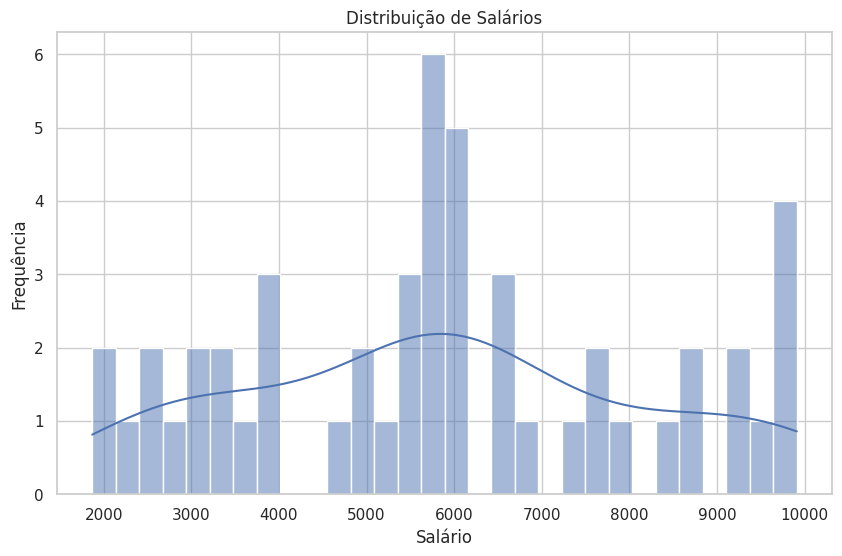

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sal√°rio'], bins=30, kde=True)
plt.title('Distribui√ß√£o de Sal√°rios')
plt.xlabel('Sal√°rio')
plt.ylabel('Frequ√™ncia')
plt.show()

## üßë‚Äçüíº Gr√°fico 2 - Funcion√°rios por Departamento

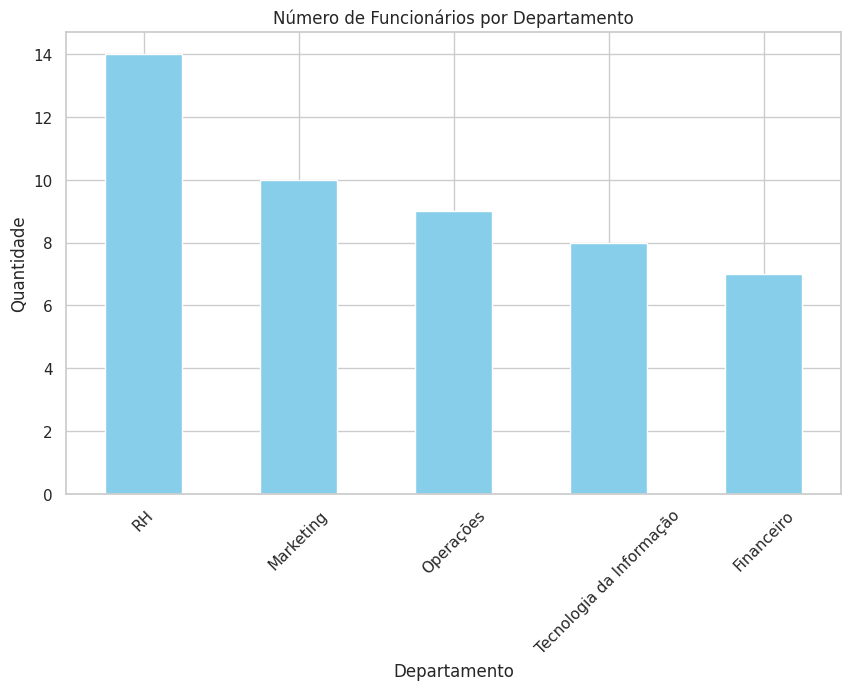

In [25]:
plt.figure(figsize=(10, 6))
df['Departamento'].value_counts().plot(kind='bar', color='skyblue')
plt.title('N√∫mero de Funcion√°rios por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

## üìà Gr√°fico 3 - M√©dia Salarial por Departamento

<ipython-input-26-0f16aa2647cc>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Departamento'], y=df['Sal√°rio'], estimator='mean', ci=None, palette='viridis')
<ipython-input-26-0f16aa2647cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Departamento'], y=df['Sal√°rio'], estimator='mean', ci=None, palette='viridis')


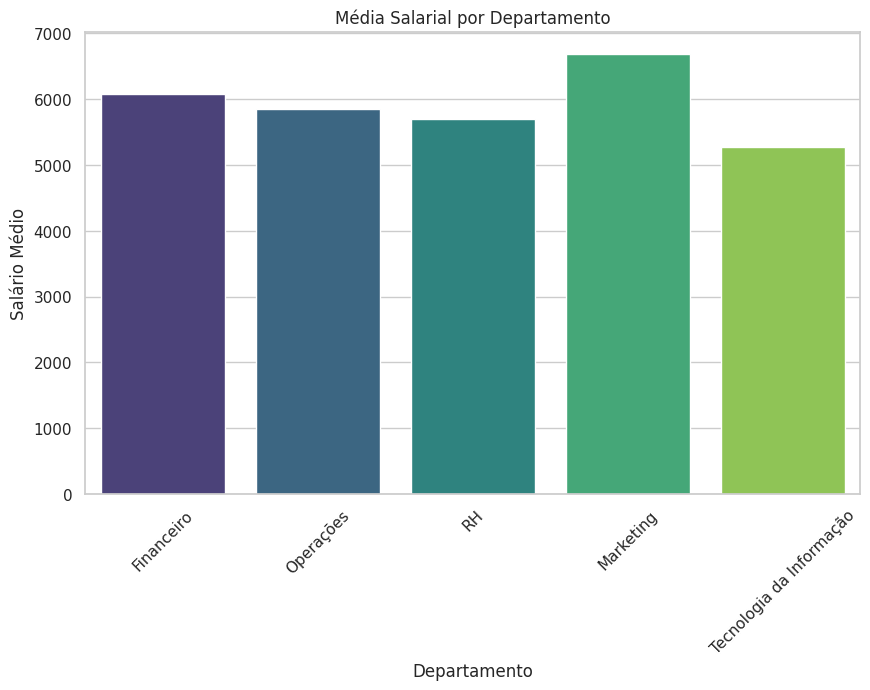

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Departamento'], y=df['Sal√°rio'], estimator='mean', ci=None, palette='viridis')
plt.title('M√©dia Salarial por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Sal√°rio M√©dio')
plt.xticks(rotation=45)
plt.show()

## üéØ Gr√°fico 4 - Avalia√ß√£o de Desempenho

<ipython-input-27-1a92a33a122c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Avalia√ß√£o de Desempenho', data=df, palette='pastel')


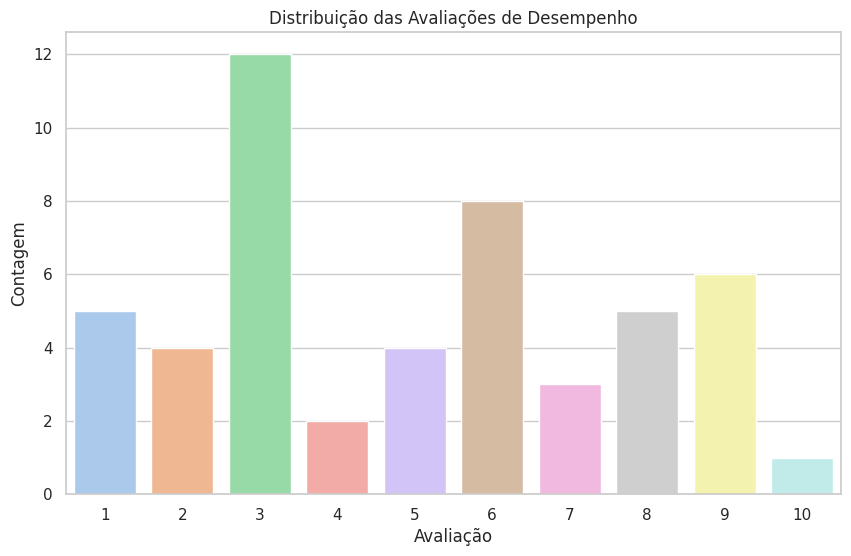

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Avalia√ß√£o de Desempenho', data=df, palette='pastel')
plt.title('Distribui√ß√£o das Avalia√ß√µes de Desempenho')
plt.xlabel('Avalia√ß√£o')
plt.ylabel('Contagem')
plt.show()

## ‚è≥ Gr√°fico 5 - Top 10 Funcion√°rios com mais Tempo de Empresa

<ipython-input-28-50afc60f8ba0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tempo na Empresa', y='Nome', data=top10, palette='magma')


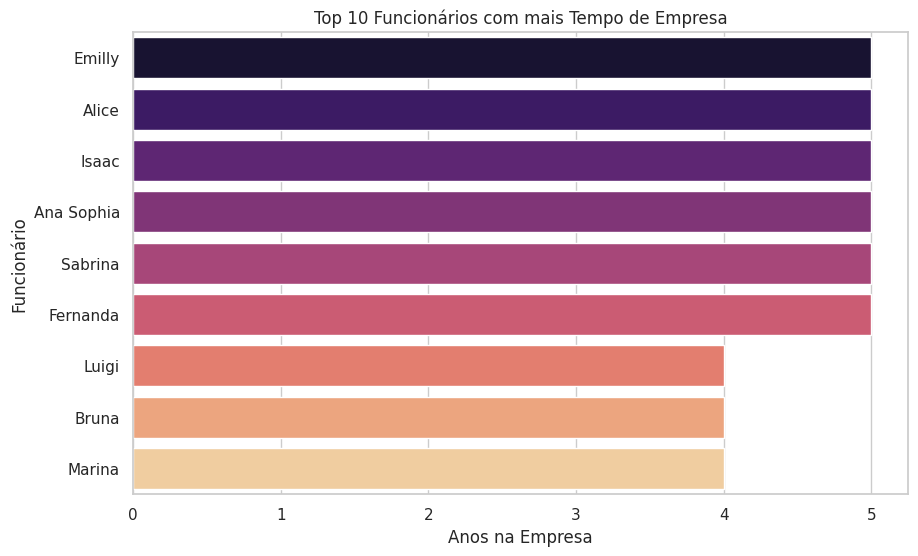

In [28]:
top10 = df.sort_values(by='Tempo na Empresa', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Tempo na Empresa', y='Nome', data=top10, palette='magma')
plt.title('Top 10 Funcion√°rios com mais Tempo de Empresa')
plt.xlabel('Anos na Empresa')
plt.ylabel('Funcion√°rio')
plt.show()